In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('numpy:', np.version.version)
print('pandas:', pd.__version__)

numpy: 1.24.3
pandas: 2.0.3


Linear Regression

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
dataset.columns

In [ ]:
class LinearRegression:
 
    def fit(self, X, Y):
        print("Initital X shape: ",X.shape)
        print("Initital Y shape: ",Y.shape)
        
        X = np.array(X).reshape(-1, 2) # convert the argument X into numpy arrays and reshape them into the shape (number of data, number of feature variables)
        Y = np.array(Y).reshape(-1, 2)
        x_shape = X.shape
        print("Numpy_X_Shape: ", X.shape,"\nNumpy_Y_Shape: ", Y.shape)
        
        # self.parameter_cache = []
        num_var = x_shape[1]  # the shape corresponds to number of input variable dimensions. There"s only one for this dataset i.e weight of person
        self.weight_matrix = np.random.normal(0,1,(num_var,1))
        self.intercept = np.random.rand(1)

        print("Num_Var: ", num_var)
        print("Initial Weight: ", self.weight_matrix)
        print("Initial Intercept: ", self.intercept)

        for i in range(50):
            self.dcostdm = np.sum(np.multiply(((np.matmul(X,self.weight_matrix)+self.intercept)-Y),X))*2/x_shape[0] #w.r.t to the weight
            self.dcostdc = np.sum(((np.matmul(X,self.weight_matrix)+self.intercept)-Y))*2/x_shape[0] #partial derivative of cost w.r.t the intercept
            
            self.weight_matrix -= 0.1*self.dcostdm  # updating the weights with the calculated gradients
            self.intercept -= 0.1*self.dcostdc  # updating the weights with the calculated gradients
            # print("Updated Weight: ", self.weight_matrix)
            # print("Updated Intercept: ", self.intercept)
            # print(np.array(self.weight_matrix))
            # print(np.array(self.intercept))
            
            # self.parameter_cache.append(np.array((self.weight_matrix,self.intercept)))   #the parameters are cached just to track the progress
        print("Final Weight: ", self.weight_matrix)
        print("Final Intercept: ", self.intercept)
        return self.weight_matrix,self.intercept #,self.parameter_cache

    def predict(self,X):
        product = np.matmul(np.array(X).reshape(-1, 2),self.weight_matrix)+self.intercept
        return product

reg = LinearRegression()

In [ ]:
df = dataset.copy().head(500)
#print(df.drop(['Gender'],axis=1))
df.drop(['Gender'],inplace=True,axis=1)
x = (df["Weight"]-df["Weight"].mean())/df["Weight"].std() #standardization of the dataset
y = (df["Height"]-df["Height"].mean())/df["Height"].std() #standardization of the dataset
# df.shape

In [ ]:
params = reg.fit(x,y)

In [ ]:
pred = reg.predict(np.array(x))
plt.scatter(x,y)
plt.plot(x,pred)
# plt.figure(figsize=(19, 10))
# plt.scatter(x[-180:],y[-180:])
# for i in list(np.arange(0,50,5)):
#     value = params[2][i]
#     prediction = np.matmul(np.array(x[-180:]).reshape(-1,1),value[0])+value[1]
#     plt.plot(x[-180:],prediction)

In [ ]:
"""import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros((num_features, 1))  # Reshaped to (num_features, 1)
        self.bias = 0

        # Gradient Descent for convergence
        for _ in range(self.num_iterations):
            # Linear equation: y = wx + b
            y_predicted = np.dot(X, self.weights) + self.bias

            # Cost function (MSE - Mean Squared Error)
            cost = (1 / (2 * num_samples)) * np.sum((y_predicted - y) ** 2)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update parameters using gradient descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print cost to monitor convergence
            if _ % 100 == 0:
                print(f"Iteration {_}: Cost = {cost}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias  # Updated the bias term here

# Example usage:
if __name__ == "__main__":
    # Generate sample data
    np.random.seed(0)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)

    # Initialize and train the model
    model = LinearRegression(learning_rate=0.1, num_iterations=1000)
    model.fit(X, y)

    # Make predictions
    X_new = np.array([[2.5]])
    y_pred = model.predict(X_new)

    print(f"Prediction for X = {X_new[0]}: {y_pred[0][0]}")
"""

Iteration 0: CostFuntion = 53.330318695242276
Iteration 100: CostFuntion = 0.9991922001031094
Iteration 200: CostFuntion = 0.9992018591124919
Iteration 300: CostFuntion = 1.0097433411615477
Iteration 400: CostFuntion = 0.9991923301992091
Iteration 500: CostFuntion = 0.9992037460171965
Iteration 600: CostFuntion = 1.0097908727072507
Iteration 700: CostFuntion = 0.9991926284335474
Iteration 800: CostFuntion = 0.9992058010601397
Iteration 900: CostFuntion = 1.0098385723911922
Iteration 1000: CostFuntion = 0.9991930948061248
R-squared Metric: 0.7452408459718105
Final Wight: [[2.84909669]] Final Bias: 4.380000000000151


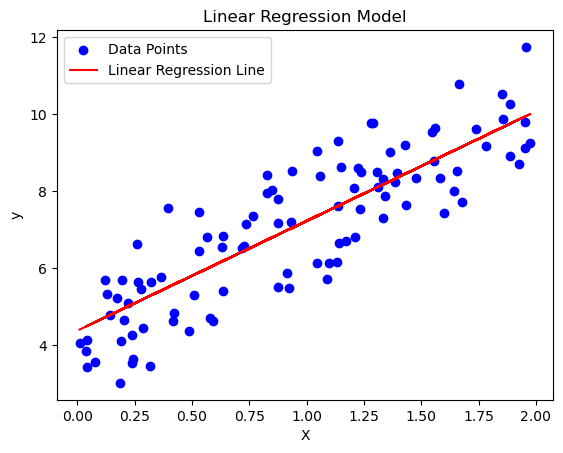

In [65]:
######################################
#           GPT Version              #
######################################
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def cost_function_mae(self, y_predicted, y):
        
        # Mean Absolute Error (MAE)
        num_samples = len(y)
        return (1 / num_samples) * np.sum(np.abs(y_predicted - y))
    
    # Mean Squared Error (MSE) cost function
    def cost_function_mse(self, y_true, y_pred):
        return ((y_pred - y_true) ** 2).mean()
    
    # R-squared (R^2) score
    def r_squared(self, y_predicted, y):
        # Calculate the sum of squared residuals
        ssr = np.sum((y - y_predicted) ** 2)
        # Calculate the total sum of squares
        sst = np.sum((y - np.mean(y)) ** 2)
        # Calculate R-squared
        r2 = 1 - (ssr / sst)
        
        return r2

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros((num_features, 1))  # Reshaped to (num_features, 1)
        self.bias = 0

        # Gradient Descent for convergence
        for _ in range(self.num_iterations + 1):
            # Linear equation: y = wx + b
            y_predicted = np.dot(X, self.weights) + self.bias

            # Cost function
            cost = self.cost_function_mse(y_predicted, y)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, np.sign(y_predicted - y))  # Gradient for MAE
            db = (1 / num_samples) * np.sum(np.sign(y_predicted - y))  # Gradient for MAE

            # Update parameters using gradient descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print cost to monitor convergence
            if _ % 100 == 0:
                print(f"Iteration {_}: CostFuntion = {cost}")
                
        # Calculate R-squared
        r2_score = self.r_squared(y_predicted, y)
        print(f"R-squared Metric: {r2_score}")
        print("Final Wight:",self.weights, "Final Bias:", self.bias)
        return self.weights, self.bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Example usage:
# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Initialize and train the model
model = LinearRegression(learning_rate=1, num_iterations=1000)
params = model.fit(X, y)

# Make predictions
# X_new = np.array([[2.5]])
y_pred = model.predict(X)
# print(f"Prediction for X = {X[0]}: {y_pred[0][0]}")

# Plot the data points
plt.scatter(X, y, label='Data Points', c='blue')
# Plot the linear regression line
plt.plot(X, y_pred, label='Linear Regression Line', c='red')
# Add labels and a legend
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
# Show the plot
plt.title('Linear Regression Model')
plt.show()


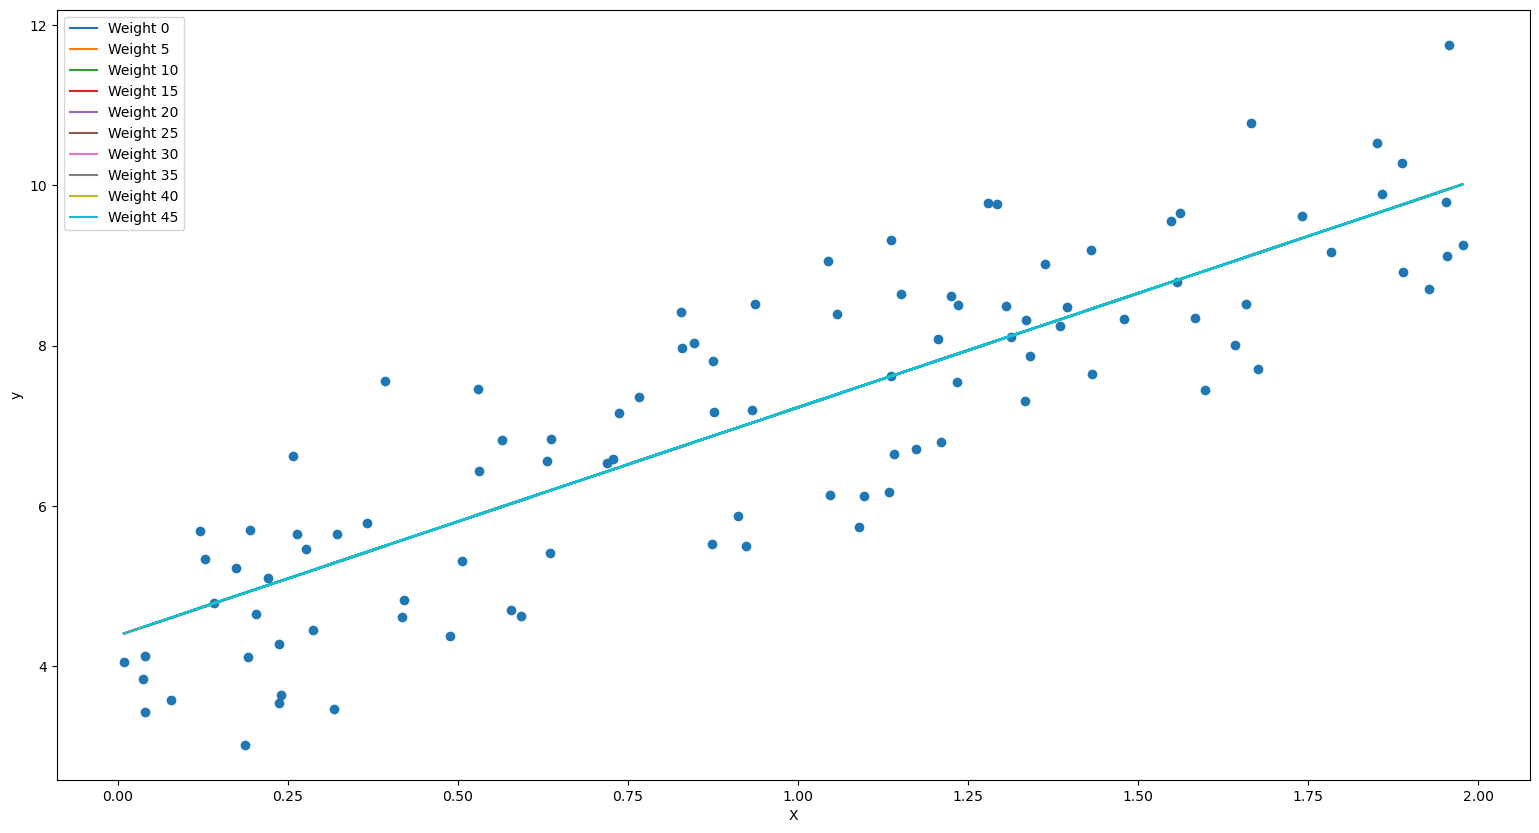

In [66]:
# Scatter plot of data
plt.figure(figsize=(19, 10))
plt.scatter(X, y)

# Plot predictions for various weights
for i in list(np.arange(0, 50, 5)):
    weight = params[0]  # Get the trained weights
    bias = params[1]    # Get the trained bias
    
    # Calculate predictions for the given weight and bias
    prediction = X * weight + bias
    
    # Plot the predictions
    plt.plot(X, prediction, label=f'Weight {i}')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()